In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

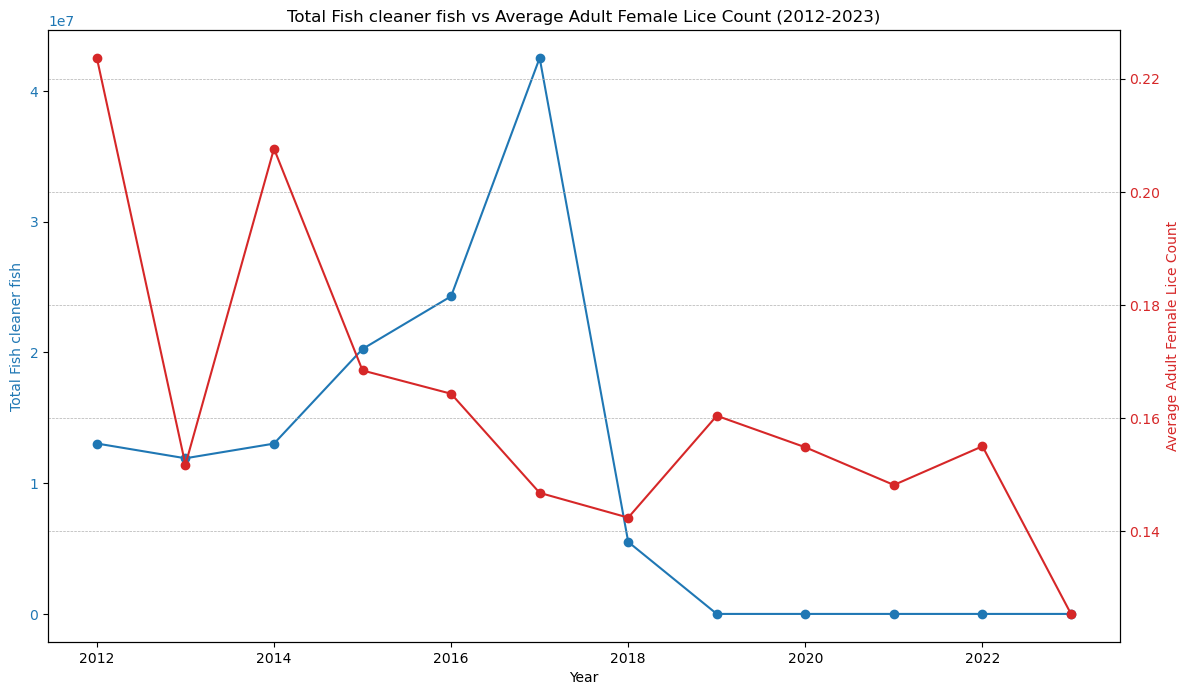

In [2]:
# Load the datasets again
tiltak_mot_lakselus_df_eng = pd.read_csv('tiltak_mot_lakselus_eng.csv')
lakselus_per_fisk_df_eng = pd.read_csv('lakselus_per_fisk_eng.csv')

# Aggregate the data
total_lice_removed = tiltak_mot_lakselus_df_eng.groupby('Year')['Number'].sum()
average_lice_per_fish = lakselus_per_fisk_df_eng.groupby('Year')['Adult Female Lice'].mean()

# Plotting the aggregated data
fig, ax1 = plt.subplots(figsize=(12, 7))

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Fish cleaner fish', color=color)
ax1.plot(total_lice_removed.index, total_lice_removed.values, color=color, label='Total cleaner Fish', marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average Adult Female Lice Count', color=color)
ax2.plot(average_lice_per_fish.index, average_lice_per_fish.values, color=color, label='Average Adult Female Lice Count', marker='o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Total Fish cleaner fish vs Average Adult Female Lice Count (2012-2023)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


In [3]:
average_lice_per_fish_PA = lakselus_per_fisk_df_eng.groupby('Production Area')['Adult Female Lice'].mean()

In [4]:
average_lice_per_fish_PA

Production Area
Andøya til Senja             0.135788
Helgeland til Bodø           0.157894
Karmøy til Sotra             0.199580
Kvaløya til Loppa            0.077652
Nord-Trøndelag med Bindal    0.182527
Nordhordland til Stadt       0.195036
Nordmøre og Sør-Trøndelag    0.158414
Ryfylket                     0.145881
Stadt til Hustadvika         0.208182
Svenskegrensen til Jæren     0.054638
Vest-Finnmark                0.077725
Vestfjorden og Vesterålen    0.145087
Øst-Finnmark                 0.028524
Name: Adult Female Lice, dtype: float64

In [5]:


# Drop rows with empty values in "Adult Female Lice"
data_cleaned = lakselus_per_fisk_df_eng.dropna(subset=['Adult Female Lice'])

# Group by "production Area", "Week", and "Year" and sum the values of "Adult Female Lice"
grouped_data = data_cleaned.groupby(['Production Area', 'Week', 'Year'])['Adult Female Lice'].mean().reset_index()

print(grouped_data.head())



    Production Area  Week  Year  Adult Female Lice
0  Andøya til Senja     1  2012           0.133000
1  Andøya til Senja     1  2013           0.095769
2  Andøya til Senja     1  2014           0.282581
3  Andøya til Senja     1  2015           0.175937
4  Andøya til Senja     1  2016           0.125161


In [6]:
# Drop rows with empty values in "Adult Female Lice"
tiltak_mot_lakselus_df_cleaned = tiltak_mot_lakselus_df_eng.dropna(subset=['Number'])

# Group by "production Area", "Week", and "Year" and sum the values of "Adult Female Lice"
grouped_data2 = tiltak_mot_lakselus_df_cleaned.groupby(['Production Area', 'Week', 'Year'])['Number'].sum().reset_index()
grouped_data_combined = data_cleaned.groupby(['Production Area', 'Week', 'Year']).agg({
    'Sea Temperature': 'mean',
    'Adult Female Lice': 'mean',
    'Lice in Mobile Stages': 'mean',
    'Attached Lice': 'mean',
    'Lat': 'mean',
    'Lon': 'mean'
}).reset_index()


print(grouped_data_combined.head())


    Production Area  Week  Year  Sea Temperature  Adult Female Lice  \
0  Andøya til Senja     1  2012         5.993500           0.133000   
1  Andøya til Senja     1  2013         5.024615           0.095769   
2  Andøya til Senja     1  2014         5.105161           0.282581   
3  Andøya til Senja     1  2015         5.550937           0.175937   
4  Andøya til Senja     1  2016         5.818710           0.125161   

   Lice in Mobile Stages  Attached Lice        Lat        Lon  
0               0.229500       0.461500  69.058510  17.012814  
1               0.441923       0.140000  69.039776  17.083565  
2               0.457097       0.155161  69.090344  17.218206  
3               0.316250       0.026562  69.049365  17.080979  
4               0.193226       0.084194  69.088389  17.235619  


In [7]:
import matplotlib.pyplot as plt
import numpy as np

def plot(data,x,y, best_fit=False):
    plt.figure(figsize=(10, 6))
    plt.scatter(data[x], data[y], color='blue', marker='o')

    if best_fit:
        m, b = np.polyfit(data[x], data[y], 1)
        best_fit_function = np.poly1d([m, b])
        x_values = data[x]
        plt.plot(x_values, best_fit_function(x_values), color='red', label='Best Fit Line')

    plt.title(x + ' vs ' + y)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    
    if best_fit:
        plt.legend()
    
    plt.show()
    if best_fit:
        print(m)


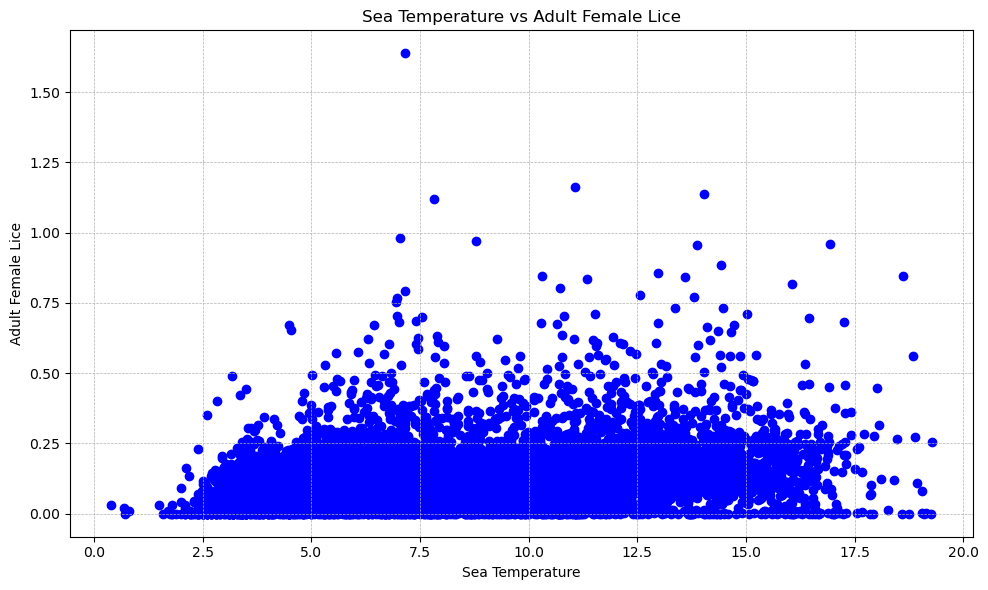

In [8]:
x='Sea Temperature'
y='Adult Female Lice'
plot(grouped_data_combined,x,y)

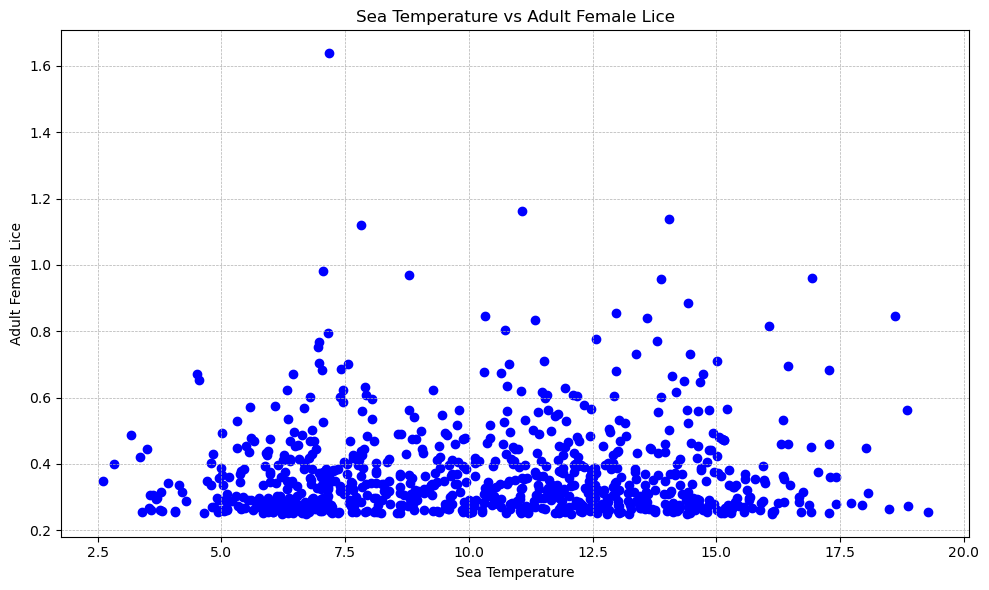

In [9]:



gn=grouped_data_combined[grouped_data_combined['Adult Female Lice']>0.25]#Adult female lice more than 0.25

x='Sea Temperature'
y='Adult Female Lice'
plot(gn,x,y)


In [10]:
gb=grouped_data[grouped_data['Adult Female Lice']>.5]

In [11]:
gb['Production Area'].unique()

array(['Andøya til Senja', 'Helgeland til Bodø', 'Karmøy til Sotra',
       'Nord-Trøndelag med Bindal', 'Nordhordland til Stadt',
       'Nordmøre og Sør-Trøndelag', 'Ryfylket', 'Stadt til Hustadvika',
       'Svenskegrensen til Jæren', 'Vest-Finnmark',
       'Vestfjorden og Vesterålen', 'Øst-Finnmark'], dtype=object)

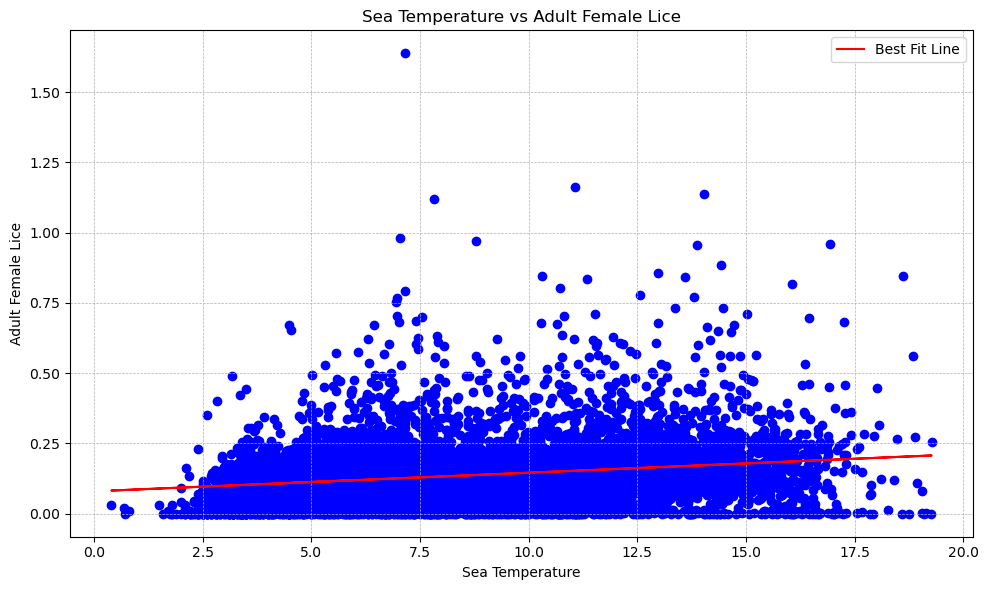

0.006612992095951464


In [12]:
#Adult female lice
x='Sea Temperature'
y='Adult Female Lice'
plot(grouped_data_combined,x,y,best_fit=True)


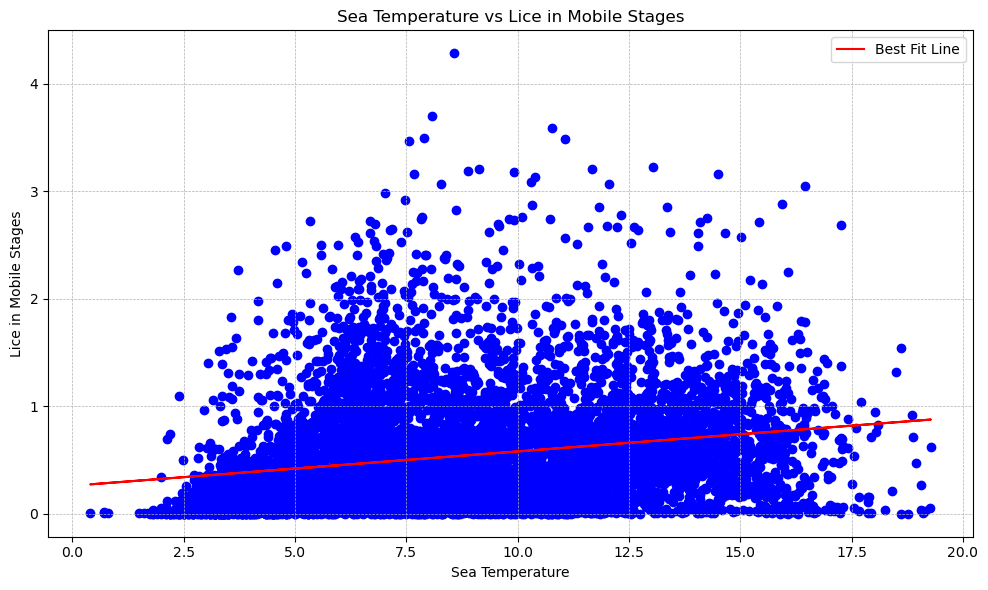

0.031922989740884006


In [13]:
#Mobile lice
x='Sea Temperature'
y='Lice in Mobile Stages'
plot(grouped_data_combined,x,y,best_fit=True)

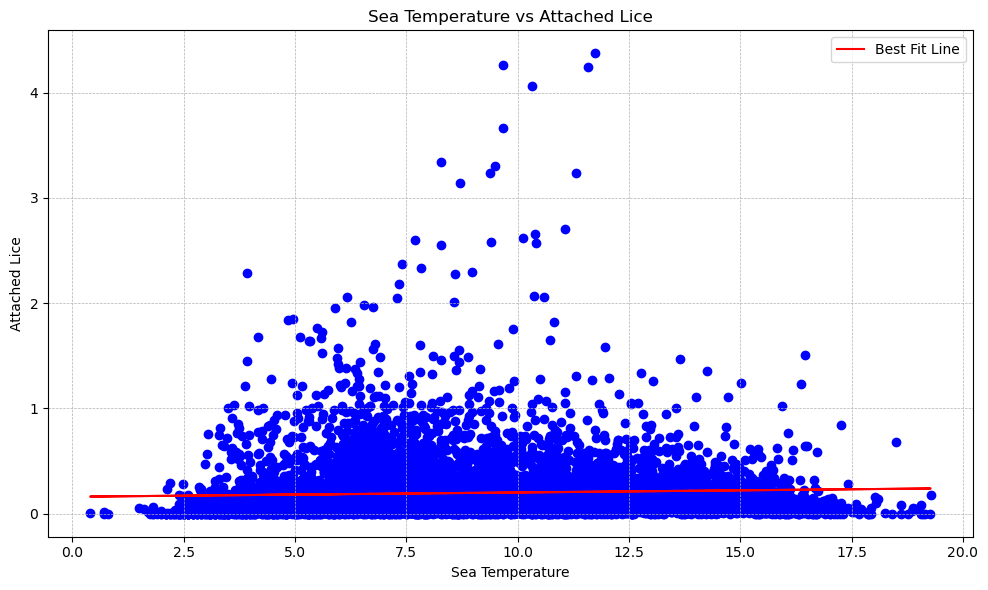

0.004060778067225807


In [14]:
#Attached lice
x='Sea Temperature'
y='Attached Lice'
plot(grouped_data_combined,x,y,best_fit=True)

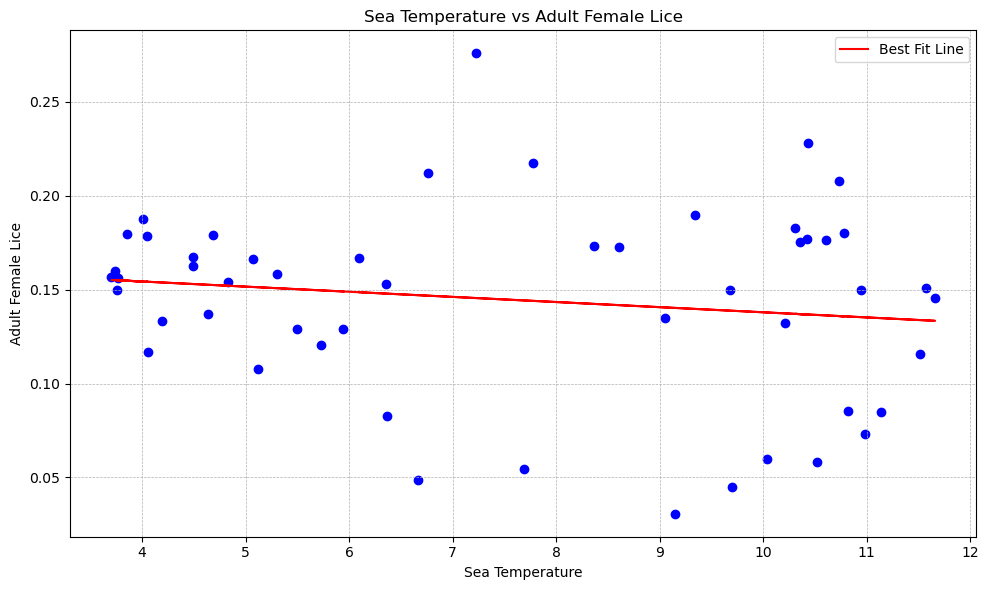

-0.0027337409279569085


In [15]:
#test data for location 'Andøya til Senja'
test_data=grouped_data_combined[(grouped_data_combined['Production Area']=='Andøya til Senja') & (grouped_data_combined['Year']==2017)] 
x='Sea Temperature'
y='Adult Female Lice'
plot(test_data,x,y,best_fit=True)

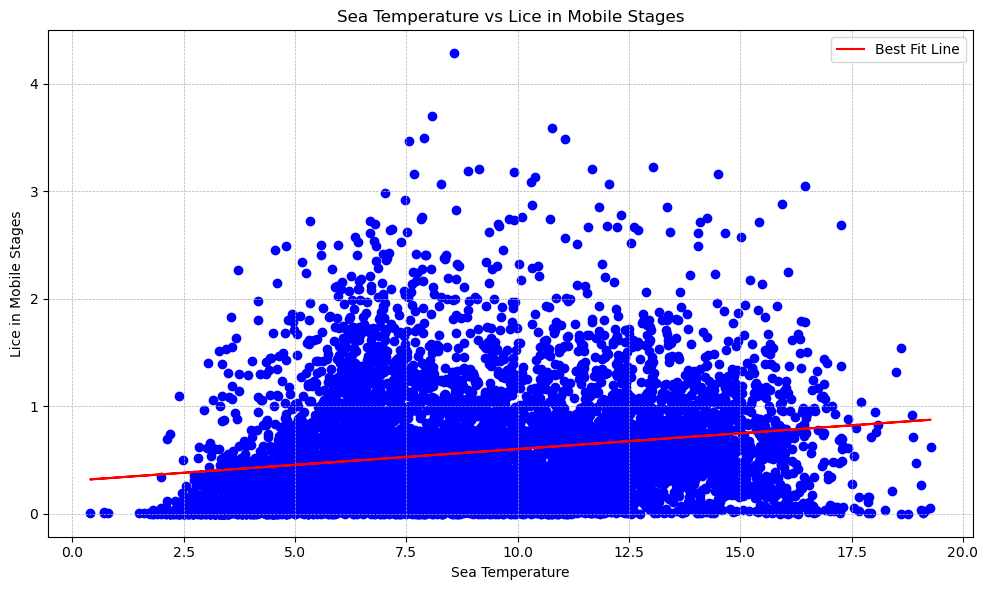

0.02940249859364388


In [16]:
#Correlation between sea temperature and lice in mobile stage and temperature for areas 
#test data for location 'Andøya til Senja'
test_data = grouped_data_combined[
    (grouped_data_combined['Production Area'] == 'Andøya til Senja') |
    (grouped_data_combined['Production Area'] == 'Helgeland til Bodø') |
    (grouped_data_combined['Production Area'] == 'Karmøy til Sotra') |
    (grouped_data_combined['Production Area'] == 'Nord-Trøndelag med Bindal') |
    (grouped_data_combined['Production Area'] == 'Nordhordland til Stadt') |
    (grouped_data_combined['Production Area'] == 'Nordmøre og Sør-Trøndelag') |
    (grouped_data_combined['Production Area'] == 'Ryfylket') |
    (grouped_data_combined['Production Area'] == 'Stadt til Hustadvika') |
    (grouped_data_combined['Production Area'] == 'Svenskegrensen til Jæren') |
    (grouped_data_combined['Production Area'] == 'Vest-Finnmark') |
    (grouped_data_combined['Production Area'] == 'Vestfjorden og Vesterålen') |
    (grouped_data_combined['Production Area'] == 'Øst-Finnmark')
]
x='Sea Temperature'
y='Lice in Mobile Stages'
plot(test_data,x,y,best_fit=True)

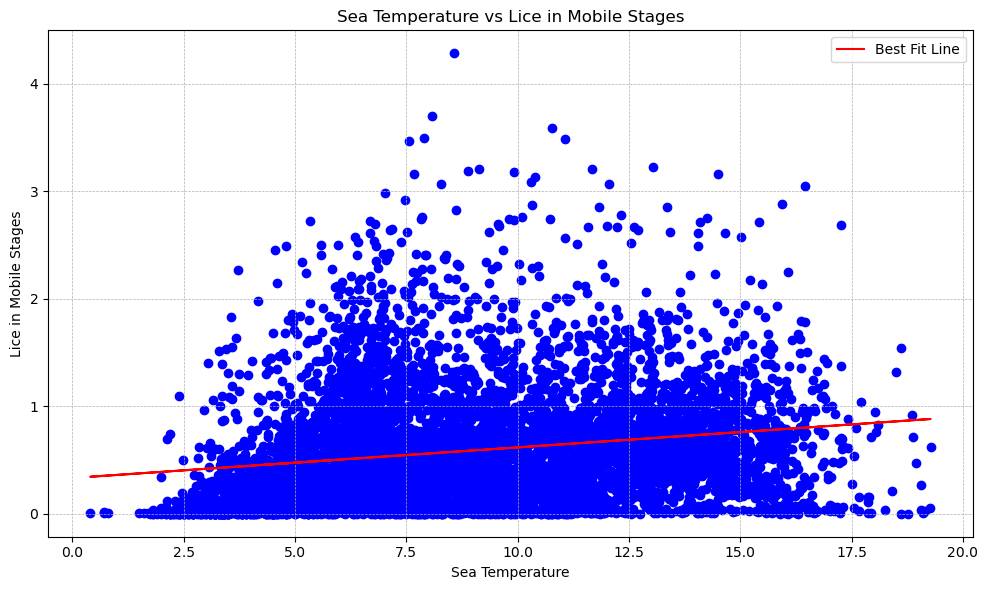

0.02846859280331161


In [17]:
#Correlation between sea temperature and lice in mobile stage and temperature for areas 
#test data for location 'Andøya til Senja'
test_data_year = grouped_data_combined[(grouped_data_combined['Year']==2017) &
    (grouped_data_combined['Production Area'] == 'Andøya til Senja') |
    (grouped_data_combined['Production Area'] == 'Helgeland til Bodø') |
    (grouped_data_combined['Production Area'] == 'Karmøy til Sotra') |
    (grouped_data_combined['Production Area'] == 'Nord-Trøndelag med Bindal') |
    (grouped_data_combined['Production Area'] == 'Nordhordland til Stadt') |
    (grouped_data_combined['Production Area'] == 'Nordmøre og Sør-Trøndelag') |
    (grouped_data_combined['Production Area'] == 'Ryfylket') |
    (grouped_data_combined['Production Area'] == 'Stadt til Hustadvika') |
    (grouped_data_combined['Production Area'] == 'Svenskegrensen til Jæren') |
    (grouped_data_combined['Production Area'] == 'Vest-Finnmark') |
    (grouped_data_combined['Production Area'] == 'Vestfjorden og Vesterålen') |
    (grouped_data_combined['Production Area'] == 'Øst-Finnmark')
]
x='Sea Temperature'
y='Lice in Mobile Stages'
plot(test_data_year,x,y,best_fit=True)

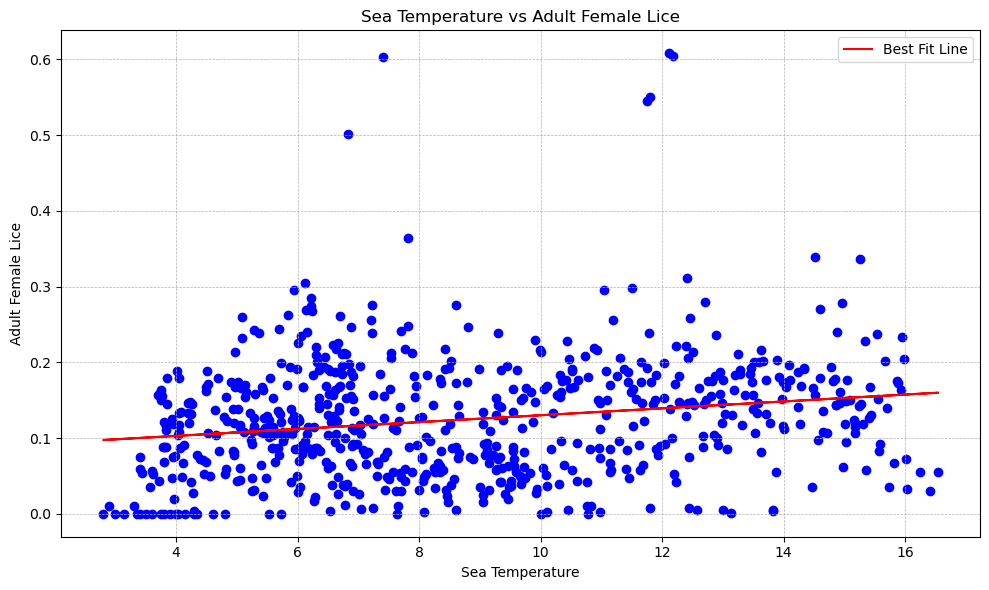

0.004550426910899127


In [18]:
#test data for location 'Andøya til Senja'
test_data=grouped_data_combined[(grouped_data_combined['Year']==2017)] 
x='Sea Temperature'
y='Adult Female Lice'
plot(test_data,x,y,best_fit=True)

In [19]:
def plot_fish_lice(latitudes, longitudes, fish_lice_values):
    """Plot fish lice values on a scatter plot with specified color criteria."""
    
    # Define color based on fish lice value
    def get_color(value):
        if value < 0.1:
            return 'green'
        elif value <= 0.2:
            return '#FFF700'  # lemon color
        elif value <= 0.3:
            return 'yellow'
        elif value <= 0.4:
            return 'orange'
        elif value <= 0.5:
            return '#FF4500'  # deeper orange
        else:
            return 'red'

    colors = [get_color(value) for value in fish_lice_values]
    
    plt.figure(figsize=(8,12))
    plt.scatter( latitudes,longitudes, c=colors, marker='.')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Fish Lice Distribution')
    plt.show()




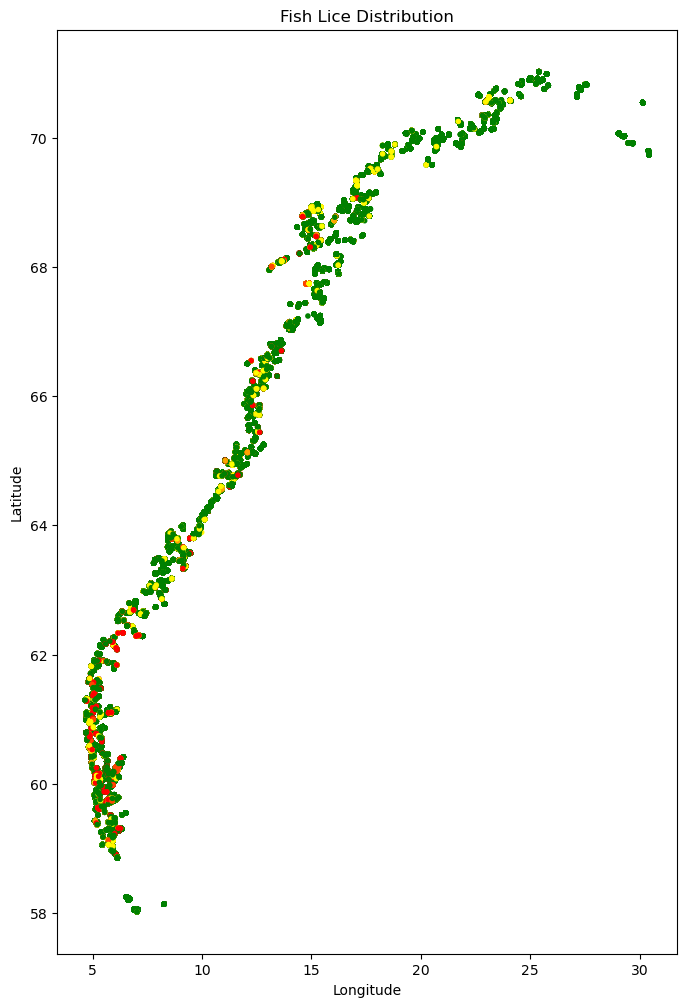

In [20]:
# Apply the function on sample data no grouping.
longitudes=data_cleaned['Lat']
latitudes=data_cleaned['Lon']
mobile_fish_lice=data_cleaned['Adult Female Lice']
plot_fish_lice(latitudes=latitudes, longitudes=longitudes, fish_lice_values=mobile_fish_lice)

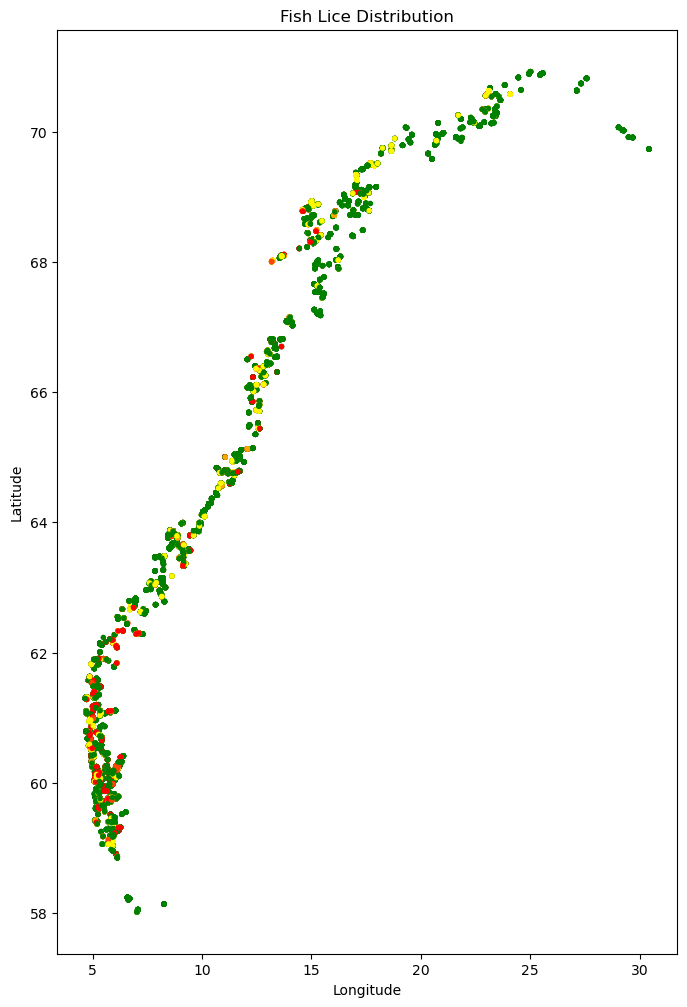

In [21]:
Year_2012=data_cleaned[data_cleaned['Year']==2012]
longitudes=Year_2012['Lat']
latitudes=Year_2012['Lon']
mobile_fish_lice=Year_2012['Adult Female Lice']
plot_fish_lice(latitudes=latitudes, longitudes=longitudes, fish_lice_values=mobile_fish_lice)

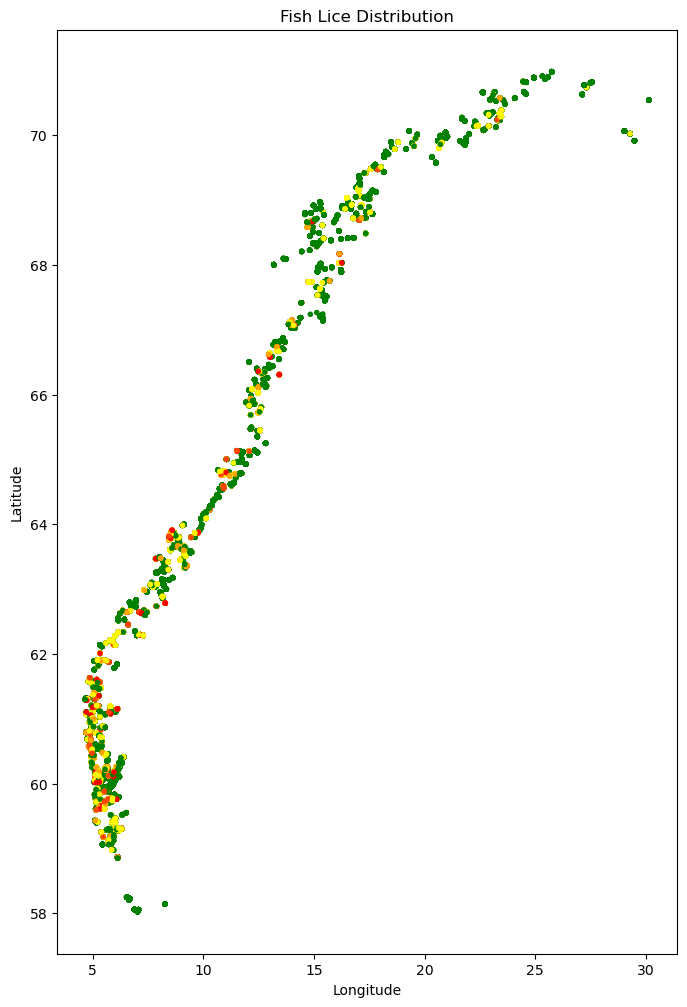

In [22]:
Year_2016=data_cleaned[data_cleaned['Year']==2016]
longitudes=Year_2016['Lat']
latitudes=Year_2016['Lon']
mobile_fish_lice=Year_2016['Adult Female Lice']
plot_fish_lice(latitudes=latitudes, longitudes=longitudes, fish_lice_values=mobile_fish_lice)

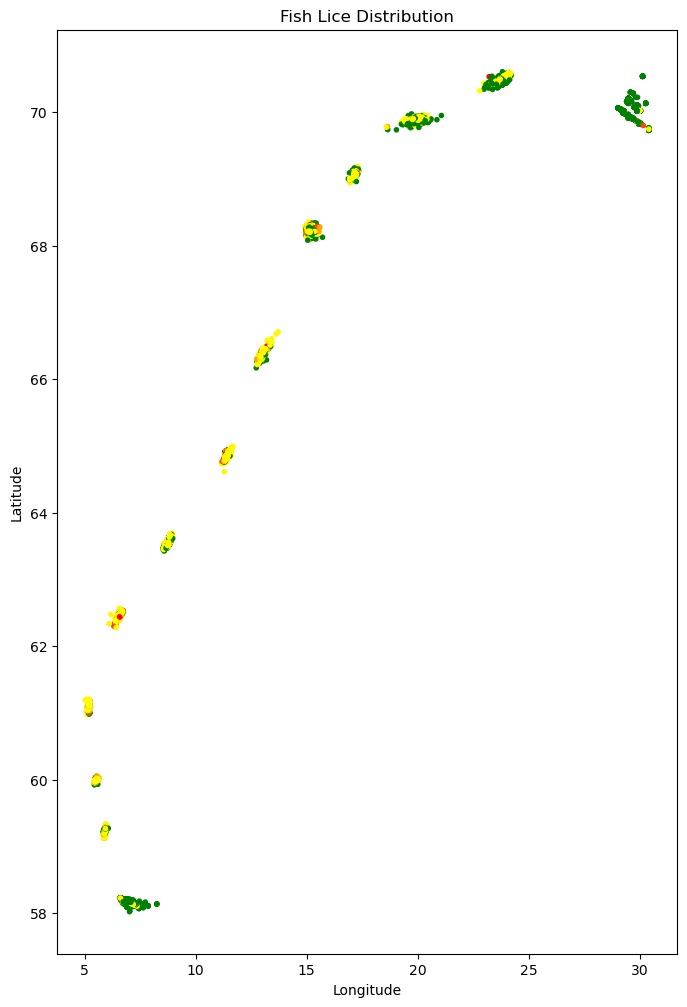

In [23]:
# Apply the function on sample data grouping by production area.
longitudes=grouped_data_combined['Lat']
latitudes=grouped_data_combined['Lon']
mobile_fish_lice=grouped_data_combined['Adult Female Lice']
plot_fish_lice(latitudes=latitudes, longitudes=longitudes, fish_lice_values=mobile_fish_lice)

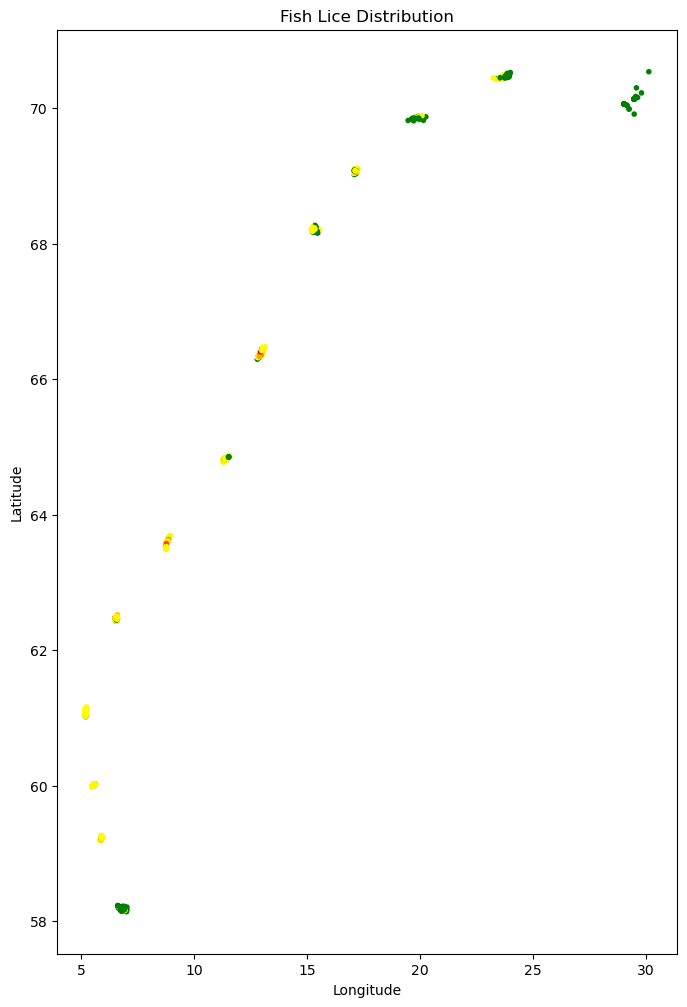

In [24]:
Grouped_Year_2016=grouped_data_combined[grouped_data_combined['Year']==2016]
longitudes=Grouped_Year_2016['Lat']
latitudes=Grouped_Year_2016['Lon']
mobile_fish_lice=Grouped_Year_2016['Adult Female Lice']
plot_fish_lice(latitudes=latitudes, longitudes=longitudes, fish_lice_values=mobile_fish_lice)

In [25]:
lakselus_per_fisk_df_eng 

,Week,Year,Locality Number,Locality Name,Adult Female Lice,Lice in Mobile Stages,Attached Lice,Likely Without Fish,Counted Salmon Lice,Municipality Number,Municipality,County Number,County,Lat,Lon,Lice Limit Week,Above Lice Limit Week,Sea Temperature,Production Area Id,Production Area
0,39,2023,30196,Ådnekvamme,NaN,NaN,NaN,Nei,Nei,4634.0,MASFJORDEN,46.0,Vestland,60.832050,5.355017,0.5,NaN,NaN,4.0,Nordhordland til Stadt
1,39,2023,35297,Ådnøy Sø,NaN,NaN,NaN,Nei,Nei,1108.0,SANDNES,11.0,Rogaland,58.914550,6.028583,0.5,NaN,NaN,2.0,Ryfylket
2,39,2023,30977,Æsøya,NaN,NaN,NaN,Nei,Nei,1860.0,VESTVÅGØY,18.0,Nordland,68.104866,13.790067,0.5,NaN,NaN,9.0,Vestfjorden og Vesterålen
3,39,2023,15196,Aga Ø,NaN,NaN,NaN,Nei,Nei,4613.0,BØMLO,46.0,Vestland,59.845917,5.260750,0.5,NaN,NaN,3.0,Karmøy til Sotra
4,39,2023,10331,Åkre,NaN,NaN,NaN,Ja,Nei,4617.0,KVINNHERAD,46.0,Vestland,60.112830,6.044717,0.5,NaN,NaN,3.0,Karmøy til Sotra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658197,1,2012,11338,Ytre Stræte,0.0,0.00,0.00,Nei,Ja,1913.0,SKÅNLAND,19.0,Troms,68.718540,17.136900,0.5,Nei,6.9,10.0,Andøya til Senja
658198,1,2012,10173,NaN,NaN,NaN,NaN,Ja,Nei,NaN,NaN,NaN,NaN,NaN,NaN,Ukjent,Ukjent,NaN,NaN,NaN
658199,1,2012,11291,NaN,NaN,NaN,NaN,Ja,Nei,NaN,NaN,NaN,NaN,NaN,NaN,Ukjent,Ukjent,7.6,NaN,NaN
658200,1,2012,19678,NaN,0.0,0.02,0.00,Nei,Ja,NaN,NaN,NaN,NaN,NaN,NaN,Ukjent,Ukjent,4.8,NaN,NaN


In [26]:
tiltak_mot_lakselus_df_eng 


,Week,Year,Locality Number,Locality Name,Measures,Type of Treatment,Active Substance,SpeciesId,Cleaner Fish,Number,Extent,Municipality Number,Municipality,County Number,County,Lat,Lon,Production Area Id,Production Area
0,39,2023,26775,Fjølværet Ø,mekanisk fjerning,NaN,NaN,NaN,NaN,NaN,deler av lokaliteten,5014.0,FRØYA,50.0,Trøndelag,63.819233,8.636133,6.0,Nordmøre og Sør-Trøndelag
1,39,2023,45129,Kvitholmen,mekanisk fjerning,NaN,NaN,NaN,NaN,NaN,deler av lokaliteten,1573.0,SMØLA,15.0,Møre og Romsdal,63.469750,8.156933,6.0,Nordmøre og Sør-Trøndelag
2,39,2023,14086,Lelandsholmen,mekanisk fjerning,NaN,NaN,NaN,NaN,NaN,deler av lokaliteten,4613.0,BØMLO,46.0,Vestland,59.728550,5.152383,3.0,Karmøy til Sotra
3,39,2023,37197,Ruggstein,mekanisk fjerning,NaN,NaN,NaN,NaN,NaN,deler av lokaliteten,5014.0,FRØYA,50.0,Trøndelag,63.770084,8.476033,6.0,Nordmøre og Sør-Trøndelag
4,38,2023,30977,Æsøya,medikamentell,fôrbehandling,Emamectin benzoat,NaN,NaN,NaN,hele lokaliteten,1860.0,VESTVÅGØY,18.0,Nordland,68.104866,13.790067,9.0,Vestfjorden og Vesterålen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53825,1,2012,30837,Torangskjeret,medikamentell,fôrbehandling,Emamectin benzoat,NaN,NaN,NaN,hele lokaliteten,1244.0,AUSTEVOLL,12.0,Hordaland,60.130184,5.176033,3.0,Karmøy til Sotra
53826,1,2012,29336,Trælsøyosen,medikamentell,badebehandling,Annet virkestoff,NaN,NaN,NaN,deler av lokaliteten,1244.0,AUSTEVOLL,12.0,Hordaland,60.117800,5.270200,3.0,Karmøy til Sotra
53827,1,2012,29336,Trælsøyosen,medikamentell,badebehandling,Deltamethrin,NaN,NaN,NaN,deler av lokaliteten,1244.0,AUSTEVOLL,12.0,Hordaland,60.117800,5.270200,3.0,Karmøy til Sotra
53828,1,2012,24135,Utåker,medikamentell,fôrbehandling,Emamectin benzoat,NaN,NaN,NaN,hele lokaliteten,1224.0,KVINNHERAD,12.0,Hordaland,59.777916,5.900683,3.0,Karmøy til Sotra


In [27]:
Cleaner_fish_df_eng=pd.DataFrame()
Cleaner_fish_df_eng['Week']=tiltak_mot_lakselus_df_eng['Week']
Cleaner_fish_df_eng['Year']=tiltak_mot_lakselus_df_eng['Year']
Cleaner_fish_df_eng['Locality Number']=tiltak_mot_lakselus_df_eng['Locality Number']
Cleaner_fish_df_eng['Number of cleaner fish']=tiltak_mot_lakselus_df_eng['Number']

In [28]:
Cleaner_fish_df_eng

,Week,Year,Locality Number,Number of cleaner fish
0,39,2023,26775,NaN
1,39,2023,45129,NaN
2,39,2023,14086,NaN
3,39,2023,37197,NaN
4,38,2023,30977,NaN
...,...,...,...,...
53825,1,2012,30837,NaN
53826,1,2012,29336,NaN
53827,1,2012,29336,NaN
53828,1,2012,24135,NaN


In [29]:
merged_df = lakselus_per_fisk_df_eng.merge(Cleaner_fish_df_eng, 
                                           on=["Week", "Year", "Locality Number"],
                                           how="left")
merged_df = merged_df.dropna(subset=['Adult Female Lice'])

merged_df
merged_df= merged_df.rename(columns={'Sea Temperature': 'Temperature'})


In [30]:

df_filtered = merged_df[ (merged_df['Year'] == 2013) & (merged_df['Week'] == 52)]


# Extract salinity from salinity data that has be precleaned and train

In [31]:
salinity_temp_press_2012_2017 = pd.read_csv('salinity_temp_press_2012_2017.csv')

In [32]:
salinity_temp_press_2012_2017

,Lat,Lon,Depth,PRES,Datetime,Year,Week,Temperature,Temperature2,Salinity,Salinity2
0,73.498610,19.338333,[ 52. 462.],[ 70.8859 361.6851],2012-01-01 00:19:00.038400,2012,1,4.40,2.35,283.000,35.509
1,72.501945,19.564444,[ 48. 380.],[ 61.7367 399.3378],2012-01-01 00:19:00.038400,2012,1,7.30,2.64,34.537,35.430
2,71.999170,19.724167,[ 59. 294.],[ 69.0414 308.715 ],2012-01-01 00:19:00.038400,2012,1,6.95,5.47,35.040,34.880
3,73.498610,19.338333,[ 52. 462.],[ 70.8859 361.6851],2012-01-01 00:39:00.038400,2012,1,4.61,2.33,282.000,35.535
4,72.501945,19.564444,[ 48. 380.],[ 59.7452 399.3378],2012-01-01 00:39:00.038400,2012,1,7.20,2.89,34.550,35.417
...,...,...,...,...,...,...,...,...,...,...,...
436167,73.500000,19.346666,[ 58. 464.],[ 0.5549 489.0778],2017-03-13 16:58:00.038400,2017,11,5.41,3.57,0.000,0.000
436168,73.500000,19.346666,[ 58. 464.],[ 0.5549 489.0778],2017-03-13 17:18:00.038400,2017,11,5.39,3.55,0.000,0.000
436169,73.500000,19.346666,[ 58. 464.],[ 0.5585 489.0778],2017-03-13 17:38:00.038400,2017,11,5.39,3.57,0.000,0.000
436170,73.500000,19.346666,[ 58. 464.],[ 0.5585 489.0778],2017-03-13 17:58:00.038400,2017,11,5.39,3.55,0.000,0.000


In [33]:
y=salinity_temp_press_2012_2017.iloc[:, 9:10]
X= pd.concat([salinity_temp_press_2012_2017.iloc[:, :9], salinity_temp_press_2012_2017.iloc[:, 10:]], axis=1)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [35]:
def CalcAccuracy_Regression_dt(Actual_Y, Predicted_y):
    error= abs(Actual_Y.to_numpy().flatten()-Predicted_y)
    mse=np.mean(np.square(error))
    rel_err=mse/np.mean(np.square(Actual_Y.to_numpy()))
    accuracy=1-rel_err
    return(accuracy)

In [36]:
def CalcAccuracy_Linear_Regression(Actual_Y, Predicted_y):
    error= abs(Actual_Y-Predicted_y)
    mse=np.mean(np.square(error))
    rel_err=mse/np.mean(np.square(Actual_Y.to_numpy()))
    accuracy=1-rel_err
    return(accuracy)

# Temperature is not used in this training because from barens watch the temperature ready were taking at a depth 

In [37]:
#Split train test data in 0.75 to 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Combine latitude, longitude, and temperature into a feature matrix
X_train_needed = X_train[['Lat', 'Lon', 'Temperature','Year','Week']]
X_test_needed=X_test[['Lat', 'Lon', 'Temperature','Year','Week']]

In [38]:
model = DecisionTreeRegressor()
model.fit(X_train_needed, y_train)
predicted_salinity_train_data = model.predict(X_train_needed)
predicted_salinity_test_data= model.predict(X_test_needed)

In [39]:
print("Train data accuracy for decision tree")
CalcAccuracy_Regression_dt(y_train, predicted_salinity_train_data)

Train data accuracy for decision tree


0.999929713741398

In [40]:
print("Test data accuracy for decision tree")
CalcAccuracy_Regression_dt(y_test, predicted_salinity_test_data)

Test data accuracy for decision tree


0.9998709076720669

In [41]:
model2 = LinearRegression()
model2.fit(X_train_needed, y_train)
predicted_salinity_train_data2 = model2.predict(X_train_needed)
predicted_salinity_test_data2= model2.predict(X_test_needed)

In [42]:
print("Train data accuracy for Linear Regression")
CalcAccuracy_Linear_Regression(y_train, predicted_salinity_train_data2)

Train data accuracy for Linear Regression


C:\Users\fisay\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Salinity    0.292605
dtype: float64

In [43]:
print("Test data accuracy for Linear Regression")
CalcAccuracy_Linear_Regression(y_test, predicted_salinity_test_data2)

Test data accuracy for Linear Regression


Salinity    0.293512
dtype: float64

In [44]:
poly_feautures=PolynomialFeatures(degree=3, include_bias=True)
X_poly_train=poly_feautures.fit_transform(X_train_needed)
X_poly_test=poly_feautures.fit_transform(X_test_needed)
model3=LinearRegression()
model3.fit(X_poly_train, y_train)
predicted_salinity_train_data3 = model3.predict(X_poly_train)
predicted_salinity_test_data3= model3.predict(X_poly_test)

In [45]:
print("Train data accuracy for Polynomial Regression")
CalcAccuracy_Linear_Regression(y_train, predicted_salinity_train_data3)

Train data accuracy for Polynomial Regression


C:\Users\fisay\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Salinity    0.744728
dtype: float64

In [46]:
print("Test data accuracy for Polynomial Regression")
CalcAccuracy_Linear_Regression(y_test, predicted_salinity_test_data3)

Test data accuracy for Polynomial Regression


Salinity    0.742186
dtype: float64

# Testing train on the data from barenswatch using Decision tree as it gave the best result 

In [47]:
#Limit time to correspond with trained data to year 2012-2017 and lat 67-73 and lon 17-23
original_data_limit=merged_df[(merged_df['Year'] >= 2012) & (merged_df['Year'] <= 2017) & (merged_df['Lat'] >= 67) & (merged_df['Lat'] <= 73) & (merged_df['Lon'] >= 17) & (merged_df['Lon'] <= 23) ] 


In [48]:
original_data_limit

,Week,Year,Locality Number,Locality Name,Adult Female Lice,Lice in Mobile Stages,Attached Lice,Likely Without Fish,Counted Salmon Lice,Municipality Number,...,County Number,County,Lat,Lon,Lice Limit Week,Above Lice Limit Week,Temperature,Production Area Id,Production Area,Number of cleaner fish
319433,52,2017,11330,Åmundsvika,0.37,0.60,0.01,Nei,Ja,1919.0,...,19.0,Troms,68.726550,17.343483,0.5,Nei,6.00,10.0,Andøya til Senja,NaN
319437,52,2017,11339,Ånderkleiva,0.04,0.10,0.00,Nei,Ja,1917.0,...,19.0,Troms,68.924020,17.149817,0.5,Nei,6.70,10.0,Andøya til Senja,NaN
319443,52,2017,13518,Angstauren,0.05,0.27,0.08,Nei,Ja,1902.0,...,19.0,Troms,69.695335,18.170267,0.5,Nei,5.20,11.0,Kvaløya til Loppa,NaN
319553,52,2017,31137,Danielsnes,0.01,0.05,0.01,Nei,Ja,2014.0,...,20.0,Finnmark,70.191720,22.321016,0.5,Nei,6.30,12.0,Vest-Finnmark,NaN
319556,52,2017,37557,Davatluft,0.00,0.06,0.00,Nei,Ja,2012.0,...,20.0,Finnmark,70.246650,22.887466,0.5,Nei,6.00,12.0,Vest-Finnmark,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668238,1,2012,23055,Storvika V,0.06,0.05,0.02,Nei,Ja,1926.0,...,19.0,Troms,69.040480,17.367697,0.5,Nei,6.07,10.0,Andøya til Senja,NaN
668305,1,2012,17077,Trettevik,0.18,0.22,0.10,Nei,Ja,1931.0,...,19.0,Troms,69.510370,18.021800,0.5,Nei,5.84,10.0,Andøya til Senja,NaN
668321,1,2012,10726,Uløybukt,0.10,0.14,0.00,Nei,Ja,1941.0,...,19.0,Troms,69.860150,20.710650,0.5,Nei,5.50,11.0,Kvaløya til Loppa,NaN
668377,1,2012,24155,Ytre Jøvik,0.00,0.00,0.00,Nei,Ja,1929.0,...,19.0,Troms,69.419400,17.337067,0.5,Nei,4.70,10.0,Andøya til Senja,NaN


In [49]:
X_train_od= original_data_limit[['Lat', 'Lon','Temperature','Year','Week']]

In [50]:
predicted_salinity_od_dd= model.predict(X_train_od)

In [51]:
predicted_salinity_od_lr= model2.predict(X_train_od)

In [52]:
X_poly_od=poly_feautures.fit_transform(X_train_od)
predicted_salinity_od_pr= model3.predict(X_poly_od)

In [53]:
predicted_salinity_od_dd

array([  0.   ,   0.   ,   0.   , ...,  35.058, 281.   , 264.   ])

In [54]:
predicted_salinity_od_pr

array([[26731610.11527634],
       [30223988.78635788],
       [ 8249301.18529892],
       ...,
       [   89926.32276535],
       [20942129.55361557],
       [30356212.6847496 ]])

# Decision Tree gives the most realistice result 

In [55]:
original_data_limit['Salinity_poly_reg']=predicted_salinity_od_pr
original_data_limit['Salinity_decision_tree']=predicted_salinity_od_dd

C:\Users\fisay\AppData\Local\Temp\ipykernel_32992\254878617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_data_limit['Salinity_poly_reg']=predicted_salinity_od_pr
C:\Users\fisay\AppData\Local\Temp\ipykernel_32992\254878617.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_data_limit['Salinity_decision_tree']=predicted_salinity_od_dd


In [56]:
original_data_limit

,Week,Year,Locality Number,Locality Name,Adult Female Lice,Lice in Mobile Stages,Attached Lice,Likely Without Fish,Counted Salmon Lice,Municipality Number,...,Lat,Lon,Lice Limit Week,Above Lice Limit Week,Temperature,Production Area Id,Production Area,Number of cleaner fish,Salinity_poly_reg,Salinity_decision_tree
319433,52,2017,11330,Åmundsvika,0.37,0.60,0.01,Nei,Ja,1919.0,...,68.726550,17.343483,0.5,Nei,6.00,10.0,Andøya til Senja,NaN,2.673161e+07,0.000
319437,52,2017,11339,Ånderkleiva,0.04,0.10,0.00,Nei,Ja,1917.0,...,68.924020,17.149817,0.5,Nei,6.70,10.0,Andøya til Senja,NaN,3.022399e+07,0.000
319443,52,2017,13518,Angstauren,0.05,0.27,0.08,Nei,Ja,1902.0,...,69.695335,18.170267,0.5,Nei,5.20,11.0,Kvaløya til Loppa,NaN,8.249301e+06,0.000
319553,52,2017,31137,Danielsnes,0.01,0.05,0.01,Nei,Ja,2014.0,...,70.191720,22.321016,0.5,Nei,6.30,12.0,Vest-Finnmark,NaN,-4.010085e+06,0.000
319556,52,2017,37557,Davatluft,0.00,0.06,0.00,Nei,Ja,2012.0,...,70.246650,22.887466,0.5,Nei,6.00,12.0,Vest-Finnmark,NaN,-9.413214e+06,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668238,1,2012,23055,Storvika V,0.06,0.05,0.02,Nei,Ja,1926.0,...,69.040480,17.367697,0.5,Nei,6.07,10.0,Andøya til Senja,NaN,2.272557e+07,270.000
668305,1,2012,17077,Trettevik,0.18,0.22,0.10,Nei,Ja,1931.0,...,69.510370,18.021800,0.5,Nei,5.84,10.0,Andøya til Senja,NaN,9.824830e+06,272.000
668321,1,2012,10726,Uløybukt,0.10,0.14,0.00,Nei,Ja,1941.0,...,69.860150,20.710650,0.5,Nei,5.50,11.0,Kvaløya til Loppa,NaN,8.992632e+04,35.058
668377,1,2012,24155,Ytre Jøvik,0.00,0.00,0.00,Nei,Ja,1929.0,...,69.419400,17.337067,0.5,Nei,4.70,10.0,Andøya til Senja,NaN,2.094213e+07,281.000


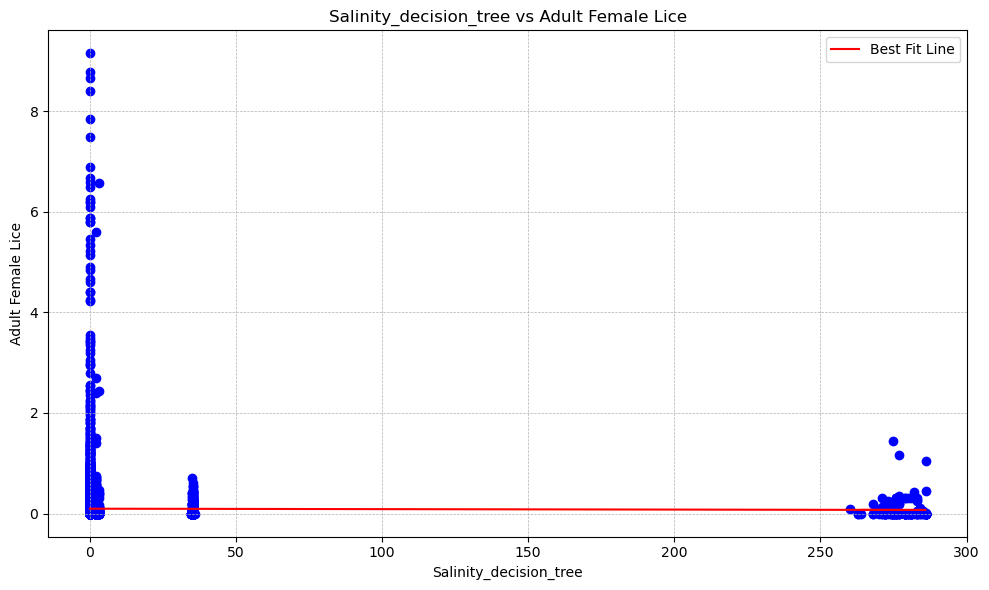

-8.894679801056214e-05


In [57]:
x='Salinity_decision_tree'
y='Adult Female Lice'
plot(original_data_limit,x,y,best_fit=True)

# Predict number of Female lice count from barenswatch data 

In [58]:
# Load the datasets again
tiltak_mot_lakselus_df_eng = pd.read_csv('tiltak_mot_lakselus_eng.csv')
lakselus_per_fisk_df_eng = pd.read_csv('lakselus_per_fisk_eng.csv')

# Aggregate the data
total_lice_removed = tiltak_mot_lakselus_df_eng.groupby('Year')['Number'].sum()
average_lice_per_fish = lakselus_per_fisk_df_eng.groupby('Year')['Adult Female Lice'].mean()

# Plotting the aggregated data


In [59]:
average_lice_per_fish_PA = lakselus_per_fisk_df_eng.groupby('Production Area')['Adult Female Lice'].mean()

In [60]:
# Drop rows with empty values in "Adult Female Lice"
data_cleaned = lakselus_per_fisk_df_eng.dropna(subset=['Adult Female Lice'])

In [61]:
labelencoder = LabelEncoder()
Columns=data_cleaned.columns
data_cleaned_encoded=pd.DataFrame()
for col in Columns:
    data_cleaned_encoded[col] = labelencoder.fit_transform(data_cleaned[col])

In [62]:
#correlation after encoding 
data_cleaned_encoded[data_cleaned_encoded.columns].corr().abs()['Lice in Mobile Stages'][:].sort_values(ascending=False)

Lice in Mobile Stages    1.000000
Adult Female Lice        0.583484
Attached Lice            0.472807
Above Lice Limit Week    0.412105
Lon                      0.255363
Production Area Id       0.215890
Lat                      0.212503
Municipality Number      0.153538
County Number            0.144222
Sea Temperature          0.075439
Year                     0.074820
Production Area          0.062173
Lice Limit Week          0.061505
Municipality             0.042856
Locality Number          0.038980
County                   0.035494
Week                     0.030018
Locality Name            0.026522
Likely Without Fish           NaN
Counted Salmon Lice           NaN
Name: Lice in Mobile Stages, dtype: float64

In [63]:
#Drop columns with no correlation from dat
columns_to_drop = ['Likely Without Fish', 'Counted Salmon Lice']
data_cleaned_encoded_drop = data_cleaned_encoded.drop(columns=columns_to_drop)

In [64]:
y=data_cleaned_encoded_drop.iloc[:, 4:5]
X= pd.concat([data_cleaned_encoded_drop.iloc[:, :4], data_cleaned_encoded_drop.iloc[:, 5:]], axis=1)

In [65]:
#Split train test data in 0.75 to 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [66]:
def CalcAccuracy(Actual_Y, Predicted_y):
    
    actual_values=Actual_Y.to_numpy().flatten()
    predicted_values=np.array(Predicted_y)
    error= abs(actual_values-predicted_values)
    mse=np.mean(np.square(error))
    rel_err=mse/np.mean(np.square(actual_values))
    accuracy=1-rel_err
    return(accuracy)

In [67]:
sk_tree=DecisionTreeRegressor(max_depth=5,min_impurity_decrease=0.0000001)
sk_tree.fit(X_train,y_train)
sk_predicted=sk_tree.predict(X_train)
print("Accuracy of train data")
CalcAccuracy(y_train,sk_predicted)
#train data

Accuracy of train data


0.7248198337914777

In [68]:
sk_tree.fit(X_train,y_train)#fit with train data
sk_prd=sk_tree.predict(X_test)
print("Accuracy of test data")
CalcAccuracy(y_test,sk_prd)
#test

Accuracy of test data


0.723841370769905